# COGS 108 - Final Project 

# Overview

# Name & PID

- Name: Gerrick Baldevarona
- PID: A14170958

# Research Question

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE

# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df_yelp = pd.read_csv('yelp.csv')
df_inspection = pd.read_csv('inspections.csv')

df_yelp = df_yelp[['rating', 'review_count', 'latitude', 'longitude']]
df_inspection = df_inspection[['hsisid', 'x', 'y', 'score']]


In [3]:
df_yelp.head()

,rating,review_count,latitude,longitude
0,2.5,23,35.873808,-78.790896
1,4.0,17,35.802840,-78.785930
2,5.0,2,35.839681,-78.678791
3,3.0,16,35.743170,-77.964160
4,3.5,3,35.762936,-77.999428


In [4]:
df_inspection.head()

,hsisid,x,y,score
0,4092013748,-78.587963,35.783914,96.0
1,4092014046,-78.549673,35.791986,98.0
2,4092015191,-78.547960,35.723125,97.0
3,4092016122,-78.815727,35.799249,99.0
4,4092021513,-78.296347,35.831285,97.0


# Data Cleaning

Describe your data cleaning steps here.

In [5]:
## YOUR CODE HERE
def reformat(number):
    new = format(number, '.10f')
    
    return new

In [6]:
df_inspection.columns = ['restaurant_id', 'longitude', 'latitude', 'inspection_score']

df_yelp['latitude'] = df_yelp['latitude'].apply(reformat)
df_yelp['longitude'] = df_yelp['longitude'].apply(reformat)
df_inspection['latitude'] = df_inspection['latitude'].apply(reformat)
df_inspection['longitude'] = df_inspection['longitude'].apply(reformat)

merged_df = df_inspection.merge(df_yelp, how = 'inner', on = ['longitude', 'latitude'])
merged_df


,restaurant_id,longitude,latitude,inspection_score,rating,review_count
0,4092014119,-78.7205100000,35.7841260000,95.0,1.5,9
1,4092011665,-78.7205100000,35.7841260000,97.0,1.5,9
2,4092016171,-78.7205100000,35.7841260000,100.0,1.5,9
3,4092020130,-78.7205100000,35.7841260000,97.5,1.5,9
4,4092300050,-78.7205100000,35.7841260000,97.0,1.5,9
...,...,...,...,...,...,...
420,4092016983,-78.7850600000,35.9072180000,94.0,2.0,126
421,4092016983,-78.7850600000,35.9072180000,90.0,2.0,126
422,4092017146,-78.7669940000,35.9086840000,98.5,4.5,7
423,4092017177,-78.6469720000,35.7836330000,96.5,3.5,136


In [7]:
merged_df['rating'].value_counts()

4.0    103
3.5     95
4.5     86
3.0     79
1.5     46
2.0     10
1.0      6
Name: rating, dtype: int64

In [9]:
merged_df['review_count'].unique()

array([  9,  30,  29, 125,  16,  70,  27,  22,  55,   1, 247, 187, 224,
        24,   5,  44,  52, 202, 149, 102,  37,  53,  78, 220,  71,  11,
        84, 140,  10,  28,  15, 113, 277,   8, 126,   7, 136])

In [11]:
merged_df['inspection_score'].value_counts()

97.0     43
99.0     41
95.0     39
96.5     39
98.5     38
96.0     37
97.5     32
95.5     22
98.0     21
99.5     15
100.0    15
93.0     15
93.5     13
94.0     10
94.5      8
92.5      8
92.0      6
91.5      5
91.0      4
90.0      3
88.0      2
84.0      2
79.0      1
84.5      1
83.0      1
85.5      1
87.5      1
86.0      1
88.5      1
Name: inspection_score, dtype: int64

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

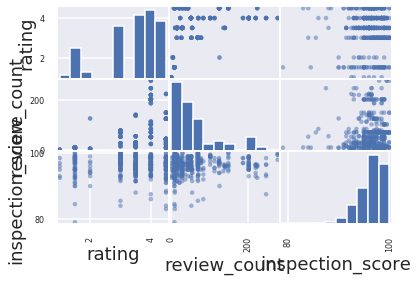

In [14]:
## YOUR CODE HERE

scatter_m = pd.plotting.scatter_matrix(merged_df[['rating', 'review_count', 'inspection_score']])

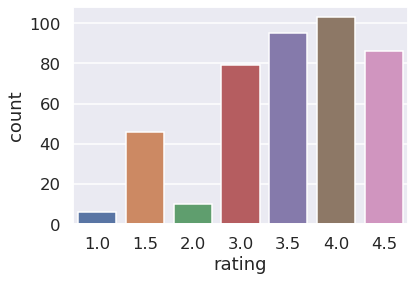

In [21]:
sns.countplot(x='rating', data = merged_df)

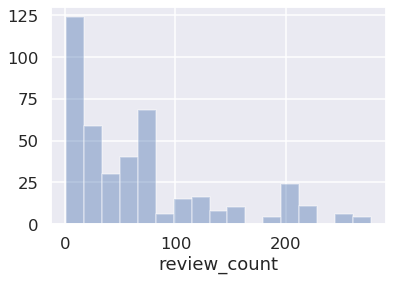

In [23]:
sns.distplot(merged_df['review_count'], kde=False)

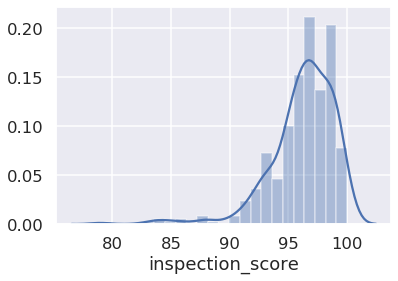

In [20]:
sns.distplot(merged_df['inspection_score'])

In [24]:
rating = merged_df['rating']
score = merged_df['inspection_score']

a1, b1 = np.polyfit(rating, score, 1)

In [26]:
pred_rating = a1 * np.arange(1.0, 4.5) + b1

array([95.83348453, 95.99118224, 96.14887996, 96.30657767])

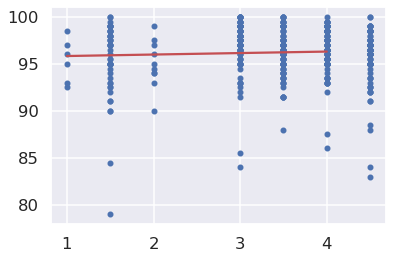

In [32]:
plt.scatter('rating', 'inspection_score', data=merged_df, marker = '.');

plt.plot(np.arange(1.0,4.5), pred_rating, 'r')

Using a scatterplot to predict inspection score from ratings seems to not be working so I skipped using it for the review count.

I will use OLS to predict in the next cell with an alpha value 0f 0.05

In [30]:
outcome_1, predictors_1 = patsy.dmatrices('inspection_score ~ rating', merged_df) 

mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()

In [31]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.166
Date:                Thu, 11 Jun 2020   Prob (F-statistic):              0.281
Time:                        20:40:00   Log-Likelihood:                -1043.4
No. Observations:                 425   AIC:                             2091.
Df Residuals:                     423   BIC:                             2099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.6758      0.521    183.533      0.0

In [33]:
outcome_2, predictors_2 = patsy.dmatrices('inspection_score ~ review_count', merged_df) 

mod_2 = sm.OLS(outcome_2, predictors_2)

res_2 = mod_2.fit()

In [34]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.312
Date:                Thu, 11 Jun 2020   Prob (F-statistic):             0.0384
Time:                        20:44:00   Log-Likelihood:                -1041.9
No. Observations:                 425   AIC:                             2088.
Df Residuals:                     423   BIC:                             2096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       95.9285      0.195    490.856   

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*